# Multi-Arm Bandit Algorithm : Upper Cofidence Bound

In [1]:
import pandas as pd 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Example : Guassian Reward Distribution 

In [11]:
def run_experiment_ucb(number_of_bandit, q_true, ucb_par, number_of_run, number_of_time_step):
    
    sum_of_rewards  = np.zeros( number_of_time_step )
    count_of_all_actions  = np.zeros( (number_of_time_step, number_of_bandit) )
    count_of_optimal_action = np.zeros( number_of_time_step )

    
    for r in range(number_of_run):    
        #q_true = np.random.normal(0,1,number_of_bandit)
        
        N_act = np.repeat( 1, number_of_bandit )
        Q_act = np.zeros( number_of_bandit )
    
        list_of_actions = []
        list_of_rewards = []
        list_of_optimal_action = np.zeros( number_of_time_step )
        
        for t in range(number_of_time_step):
            """Step 1: pick the machine (action) that gives the highest expected reward"""
            UCB = ucb_par * np.sqrt( np.log(t+1)/N_act )
            Q_ucb = Q_act +  UCB
            A = np.argmax( Q_ucb )
            
            #Q_max = Q_ucb.max()
            #A = np.random.choice(np.flatnonzero(Q_ucb == Q_max)) 

            #Q_max = Q_ucb.max()
            #A = np.random.choice(np.where(Q_ucb == Q_max)[0])
                
            """Step 2: Get a radom reward from the distribution of that machine (action)"""
            reward = np.random.normal(q_true[A],1)
            
            """Step 3: Update N and Q"""
            N_act[A] += 1
            Q_act[A] += (reward - Q_act[A])/N_act[A]
            
            list_of_actions.append(A)
            list_of_rewards.append(reward)
            
            if A == np.argmax(q_true):
                list_of_optimal_action[t] += 1
            
        sum_of_rewards += np.array(list_of_rewards)
        count_of_optimal_action += np.array( list_of_optimal_action )
        
        for step, arm in enumerate(list_of_actions):
            count_of_all_actions[step][arm] += 1
        
    average_reward = sum_of_rewards /np.float(number_of_run)
    percent_of_optimal_action = count_of_optimal_action /np.float(number_of_run)
    
    return average_reward, percent_of_optimal_action, count_of_all_actions

In [12]:
number_of_bandit    = 10
number_of_run       = 2000
number_of_time_step = 1000

q_true  = np.random.normal(0,1,number_of_bandit)
ucb_par = [0.0, 0.5, 1.0]

average_reward_00, optimal_action_00, action_00 = run_experiment_ucb(number_of_bandit, q_true, ucb_par[0], number_of_run, number_of_time_step)
average_reward_05, optimal_action_05, action_05 = run_experiment_ucb(number_of_bandit, q_true, ucb_par[1], number_of_run, number_of_time_step)
average_reward_10, optimal_action_10, action_10 = run_experiment_ucb(number_of_bandit, q_true, ucb_par[2], number_of_run, number_of_time_step)

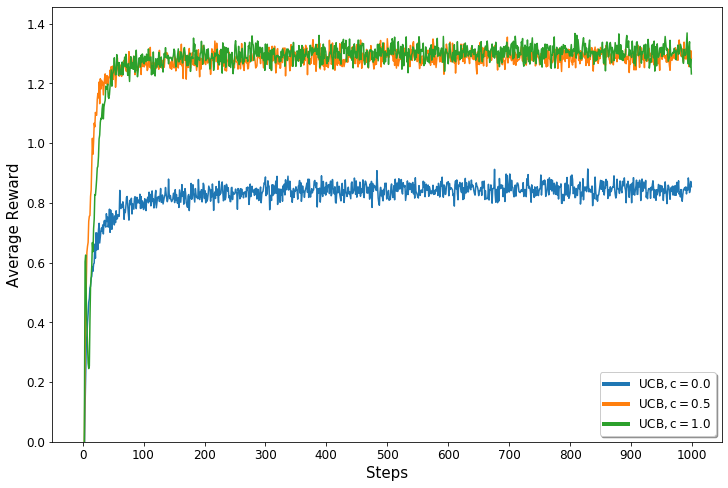

In [13]:
# Plot reward results
plt.figure(figsize = (12, 8)) 
plt.plot(average_reward_00, label =r'$\mathrm{UCB, c}=0.0$') 
plt.plot(average_reward_05, label =r'$\mathrm{UCB, c}=0.5$')
plt.plot(average_reward_10, label =r'$\mathrm{UCB, c}=1.0$')
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Average Reward", fontsize=15)

legend = plt.legend(loc='lower right', fontsize=12, shadow=True)

for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-25, number_of_time_step])

plt.ylim(ymin=0)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

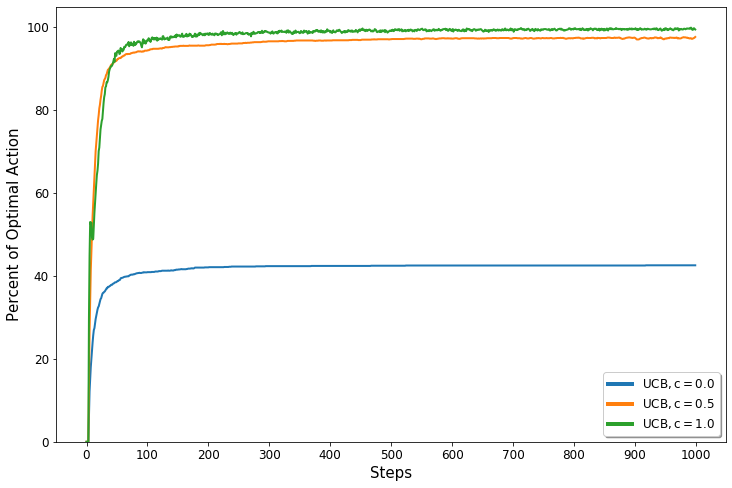

In [14]:
# Plot action results
plt.figure(figsize = (12, 8)) 
plt.plot(100*optimal_action_00, linewidth=2, label = r'$\mathrm{UCB, c}=0.0$')  
plt.plot(100*optimal_action_05, linewidth=2, label = r'$\mathrm{UCB, c}=0.5$')
plt.plot(100*optimal_action_10, linewidth=2, label = r'$\mathrm{UCB, c}=1.0$')
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Percent of Optimal Action", fontsize=15)

plt.legend() 
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)

for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-1, number_of_time_step])
plt.ylim(ymin=0)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)

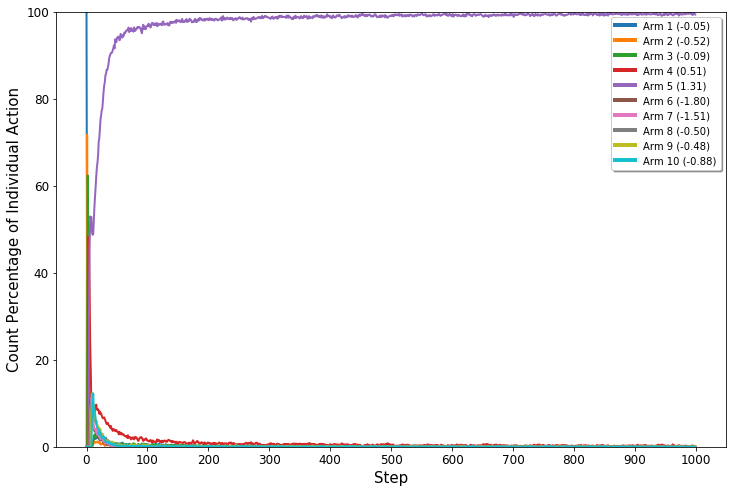

In [15]:
# Plot individual action results
plt.figure(figsize = (12, 8)) 

action = [action_00, action_05, action_10]

for i in range( number_of_bandit ):
    action_pct = 100 * action[2][:,i] / number_of_run
    steps = list( np.array(range(len(action_pct))) )
    plt.plot( steps, action_pct, "-", linewidth=2, label="Arm {} ({:.2f})".format(i+1, q_true[i]))
plt.xlabel("Time Steps", fontsize=15)
plt.ylabel("Count Percentage of Individual Action", fontsize=15)

legend = plt.legend(loc='upper right', shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)

#plt.xlim([-1, number_of_time_step])
plt.ylim(ymin=0, ymax=100)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)
plt.show()